<a href="https://colab.research.google.com/github/toba717/DataScience/blob/main/CS148_Project_2_Winter23_To_Do.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS148 Project 2 - Binary Classification Comparative Methods

For this project we're going to attempt a binary classification of a dataset using multiple methods and compare results. 

Our goals for this project will be to introduce you to several of the most common classification techniques, how to perform them and tweek parameters to optimize outcomes, how to produce and interpret results, and compare performance. You will be asked to analyze your findings and provide explanations for observed performance. 

Specifically you will be asked to classify whether a <b>patient is suffering from heart disease</b> based on a host of potential medical factors.

<b><u>DEFINITIONS</b></u>


<b> Binary Classification:</b>
In this case a complex dataset has an added 'target' label with one of two options. Your learning algorithm will try to assign one of these labels to the data.

<b> Supervised Learning:</b>
This data is fully supervised, which means it's been fully labeled and we can trust the veracity of the labeling.

## Background: The Dataset 

For this exercise we will be using a subset of the UCI Heart Disease dataset, leveraging the fourteen most commonly used attributes. All identifying information about the patient has been scrubbed. 

The dataset includes 14 columns. The information provided by each column is as follows:
<ul>
    <li><b>age:</b> Age in years</li>
    <li><b>sex:</b> (1 = male; 0 = female)</li>
    <li><b>cp:</b> Chest pain type (0 = asymptomatic; 1 = atypical angina; 2 = non-anginal pain; 3 = typical angina)</li>
    <li><b>trestbps:</b> Resting blood pressure (in mm Hg on admission to the hospital)</li>
    <li><b>cholserum:</b> Cholestoral in mg/dl</li>
    <li><b>fbs</b> Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)</li>
    <li><b>restecg:</b> Resting electrocardiographic results (0= showing probable or definite left ventricular hypertrophy by Estes' criteria; 1 = normal; 2 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV))</li>
    <li><b>thalach:</b> Maximum heart rate achieved</li>
    <li><b>exang:</b> Exercise induced angina (1 = yes; 0 = no)</li>
    <li><b>oldpeakST:</b> Depression induced by exercise relative to rest</li>
    <li><b>slope:</b> The slope of the peak exercise ST segment (0 = downsloping; 1 = flat; 2 = upsloping)</li>
    <li><b>ca:</b> Number of major vessels (0-3) colored by flourosopy</li>
    <li><b>thal:</b> 1 = normal; 2 = fixed defect; 7 = reversable defect</li>
    <li><b><u>Sick:</u></b> Indicates the presence of Heart disease (True = Disease; False = No disease)</li>
</ul>
    


## Loading Essentials and Helper Functions 

In [ ]:
#Here are a set of libraries we imported to complete this assignment. 
#Feel free to use these or equivalent libraries for your implementation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import os
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC  
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import sklearn.metrics.cluster as smc
from sklearn.model_selection import KFold


from matplotlib import pyplot
import itertools

%matplotlib inline

import random 
  
random.seed(42) 

## Part 1. Load the Data and Analyze

Let's first load our dataset so we'll be able to work with it. (correct the relative path if your notebook is in a different directory than the csv file.)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
heart = pd.read_csv('/content/drive/MyDrive/CS148_data/project2/heartdisease.csv')

Mounted at /content/drive


### Now that our data is loaded, let's take a closer look at the dataset we're working with. Use the head method,  the describe method, and the info method to display some of the rows so we can visualize the types of data fields we'll be working with.

In [ ]:
# using the method method
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,False
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,False
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,False
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,False
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,False


In [ ]:
# using the describe method
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [ ]:
# using the info method
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  sick      303 non-null    bool   
dtypes: bool(1), float64(1), int64(12)
memory usage: 31.2 KB


### Sometimes data will be stored in different formats (e.g., string, date, boolean), but many learning methods work strictly on numeric inputs. Call the info method to determine the datafield type for each column. Are there any that are problemmatic and why?

[Objects such as strings (that would be expressed as Object) will be problematic because most learning methods strictly on numeric inputs. We know that int64 and float64 are numeric so predictors with type of these will be unproblematic. However, "sick" is a bool value which indicates that the values are either True or False. These values shuold initially be converted to binary numeric target variables which are either 0 or 1.] 

### Determine if we're dealing with any null values. If so, report on which columns? 

In [ ]:
heart.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
sick        0
dtype: int64

[There is no NA values in this dataset. We can further move along in our analysis.]

### Before we begin our analysis we need to fix the field(s) that will be problematic. Specifically convert our boolean sick variable into a binary numeric target variable (values of either '0' or '1'), and then drop the original sick datafield from the dataframe. (hint: try label encoder or .astype()

In [ ]:
# generating a new sick variable with binary numeric target variable
heart["sick1"] = heart["sick"].astype(int)
# dropping the original sick datafield
heart1 = heart.drop("sick", axis = 1)

In [ ]:
# notice that the original sick predictor is dropped
heart1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick1
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,0


### Now that we have a feel for the data-types for each of the variables, plot histograms of each field and attempt to ascertain how each variable performs (is it a binary, or limited selection, or does it follow a gradient? 

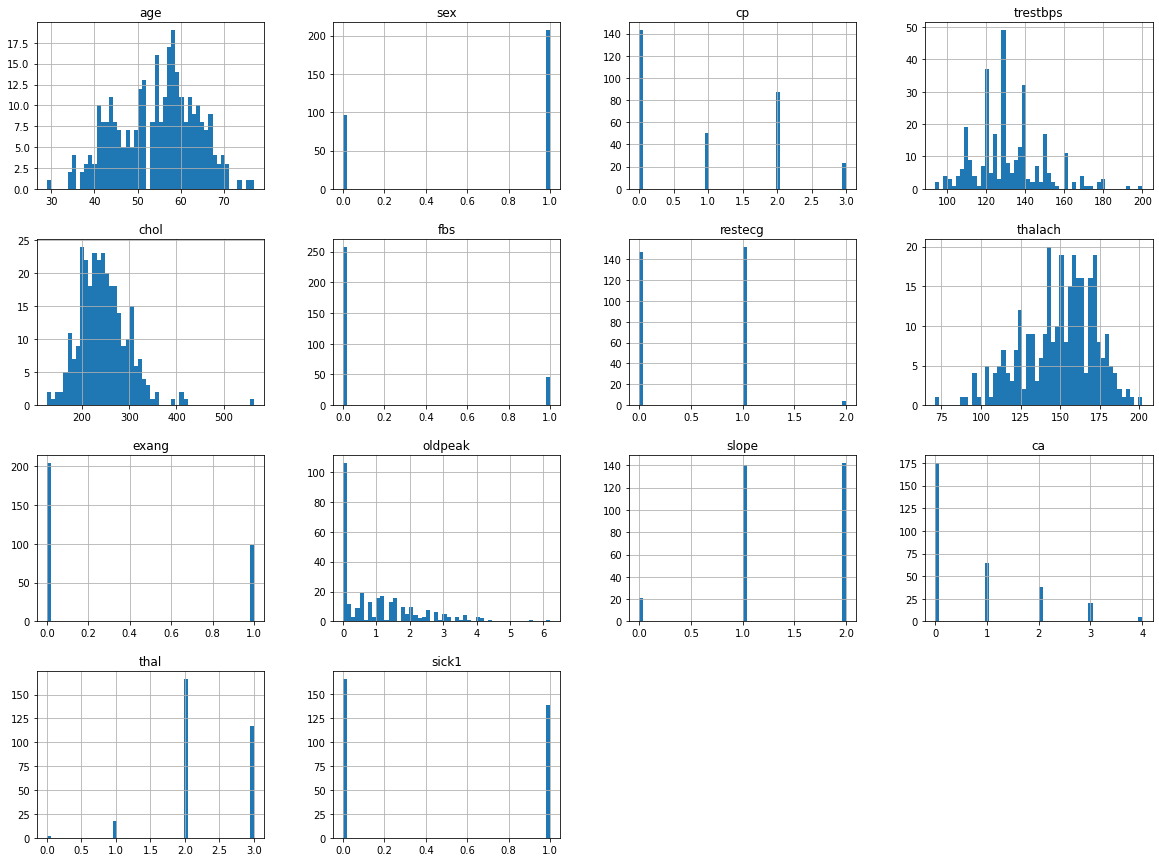

In [ ]:
heart1.hist(bins=50, figsize=(20,15))
plt.show()

## Assessing each variable
### age: follows a gradient
### sex: binary
### cp: limited selection
### trestbps: follows a gradient
### chol: follows a gradient
### fbs: binary
### restecg: limited selection
### thalach: follows a gradient
### examg: binary
### oldpeak: follows a gradient
### slope: limited selection
### ca: limited selection
### thal: limited selection
### sick1: binary



### We also want to make sure we are dealing with a balanced dataset. In this case, we want to confirm whether or not we have an equitable number of  sick and healthy individuals to ensure that our classifier will have a sufficiently balanced dataset to adequately classify the two. Plot a histogram specifically of the sick target, and conduct a count of the number of individuals that are healthy and have the heart disease and report on the results: 

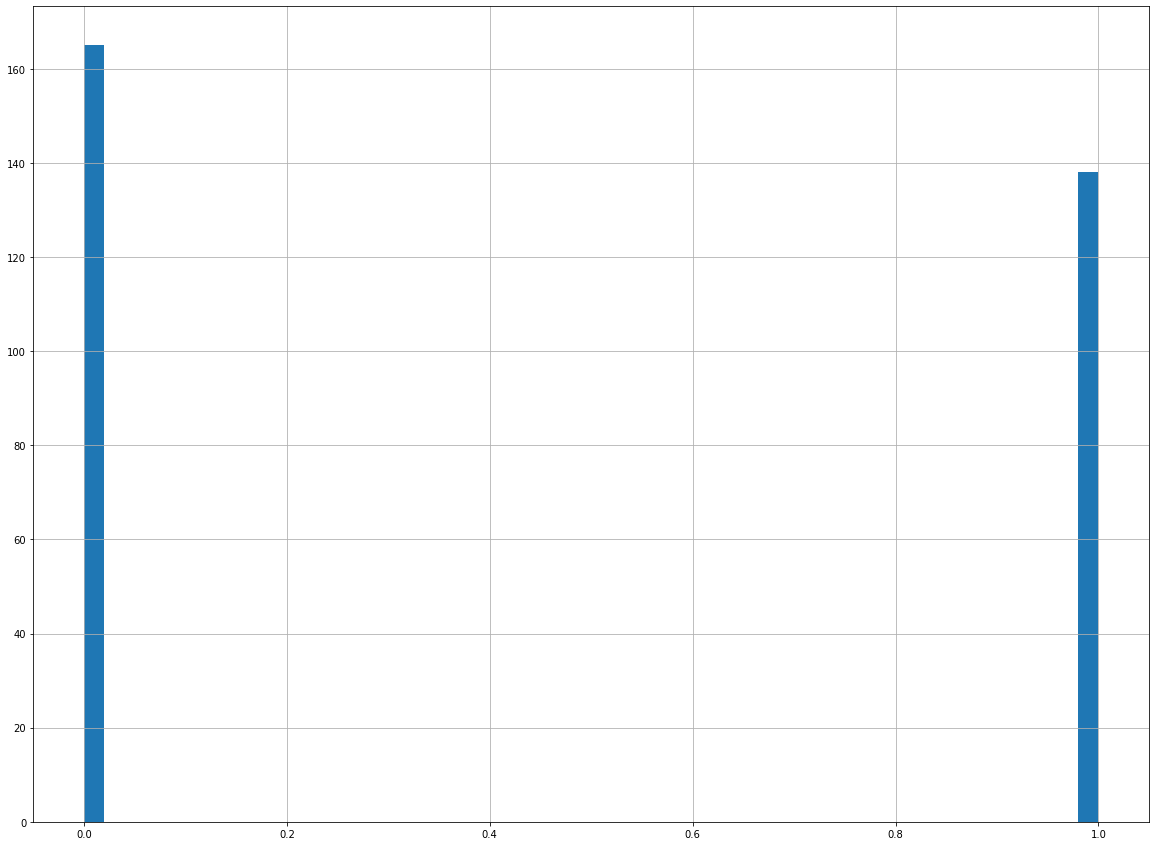

In [ ]:
heart1["sick1"].hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
heart1["sick1"].value_counts()

0    165
1    138
Name: sick1, dtype: int64

[From above, we can see that there is a great amount of individuals that are both sick and not sick. Recall that 1 represents the individuals with the disease and 0 represents the individuals without the disease. We can conclude that our classifier will have a sufficiently balanced dataset to adequately classify the two.] 

### Balanced datasets are important to ensure that classifiers train adequately and don't overfit, however arbitrary balancing of a dataset might introduce its own issues. Discuss some of the problems that might arise by artificially balancing a dataset.

[Many problems may arise if we were to artificially balance a dataset. If we are generating a classification model, the accuracy estimate will be biased if the dataset is manipulated in a biased manner. We will be artificially adjusting if we are attempting to increase the minority group or reduce the majority group. Furthermore, the training data must accurately reflect the real world, so we will be generating an inaccurate model if we use a biased dataset.] 

### Now that we have our dataframe prepared let's start analyzing our data. For this next question let's look at the correlations of our variables to our target value. First, map out the correlations between the values, and then discuss the relationships you observe. Do some research on the variables to understand why they may relate to the observed corellations. Intuitively, why do you think some variables correlate more highly than others (hint: one possible approach you can use the sns heatmap function to map the corr() method)?

In [ ]:
heart1.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick1
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,-0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,-0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,-0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,0.430696


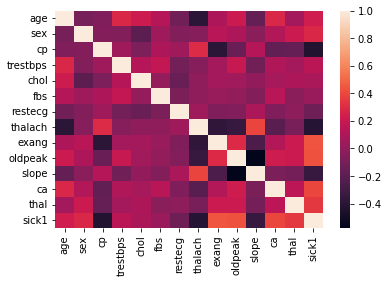

In [ ]:
import seaborn as sns
sns.heatmap(heart1.corr())
plt.show()

[We specifically want to look at the correlations of our variables to our target value. The target variable again is "sick1". The predictors with the strongest correlation with the target variable are the following: exang, oldpeak, ca. We notice that there is a negative correlation with the target variable and the following predictors: cp, thalach, slope. Intuitively, some varibles correlate more than others because they are a more significant predictor. For example, if an individual exercises and experiences angina, then there could be a higher chance that they have a heart disease. Furthermore, when considering cp or chest pain, if a patient actively experiences chest pain, they would most likely visit the doctor's office frequently and can prevent heart diseases at a very early stage.] 

## Part 2. Prepare the 'Raw' Data and run a KNN Model

Before running our various learning methods, we need to do some additional prep to finalize our data. Specifically you'll have to cut the classification target from the data that will be used to classify, and then you'll have to divide the dataset into training and testing cohorts.

Specifically, we're going to ask you to prepare 2 batches of data: 1. Will simply be the raw numeric data that hasn't gone through any additional pre-processing. The other, will be data that you pipeline using your own selected methods. We will then feed both of these datasets into a classifier to showcase just how important this step can be!

### Save the label column as a separate array and then drop it from the dataframe. 

In [ ]:
# saving the label column as a separate array
label = heart1["sick1"]
label

0      0
1      0
2      0
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    1
Name: sick1, Length: 303, dtype: int64

In [ ]:
# dropping the label column from the dataframe
heart_dropped = heart1.drop(["sick1"], axis = 1)
heart_dropped

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


### First Create your 'Raw' unprocessed training data by dividing your dataframe into training and testing cohorts, with your training cohort consisting of 80% of your total dataframe (hint: use the train_test_split() method) Output the resulting shapes of your training and testing samples to confirm that your split was successful.

In [ ]:
# dividing the dataframe into training and testing cohorts
X_train, X_test, Y_train, Y_test = train_test_split(heart_dropped, label, test_size = 0.2) # test size of 0.2 implies the training cohort to consist 80% of total df  

In [ ]:
# output of the resulting shape of the training and testing samples
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


### We'll explore how not processing your data can impact model performance by using the K-Nearest Neighbor classifier. One thing to note was because KNN's rely on Euclidean distance, they are highly sensitive to the relative magnitude of different features. Let's see that in action! Implement a K-Nearest Neighbor algorithm on our raw data and report the results. For this initial implementation simply use the default settings. Refer to the [KNN Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for details on implementation. Report on the accuracy of the resulting model.

In [ ]:
# k-Nearest Neighbors algorithm
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
# reporting the accuracy of the resulting model
from sklearn import metrics

y_pred = model.predict(X_test)
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_pred, Y_test)))

Accuracy:    0.655738


### Now implement a pipeline of your choice. You can opt to handle categoricals however you wish, however please scale your numeric features using standard scaler. Use the fit_transform() to fit this pipeline to your training data. and then transform() to apply that pipeline to your test data

### Pipeline:

In [ ]:
heart_dropped

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
# Predictors that we want to one-hot encode: cp, restecg, slope, ca, thal
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
heart_num = heart_dropped.drop(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'], axis=1) 

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])


heart_num_tr = num_pipeline.fit_transform(heart_num)
numerical_features = list(heart_num)
OHE = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'] # these predictors will be used to OHE

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, numerical_features),
        ("cat", OneHotEncoder(categories='auto', handle_unknown='ignore'), OHE),
    ])


heart_prepared = full_pipeline.fit_transform(heart_dropped)
heart_prepared.shape

(303, 30)

In [ ]:
# resplit the data
X_train, X_test, Y_train, Y_test = train_test_split(heart_prepared, label, test_size = 0.2)

In [ ]:
X_train

array([[ 1.72421839,  1.39219771, -0.02442792, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.39335191, -0.94943134,  6.14040093, ...,  0.        ,
         0.        ,  1.        ],
       [-0.7021358 , -0.54964101, -0.46891401, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.92271345, -1.74901199, -0.95205107, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.06248543,  2.7629074 ,  1.52161066, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.28306308, -1.12077005, -0.66216884, ...,  0.        ,
         1.        ,  0.        ]])

### Now retrain your model and compare the accuracy metrics with the raw and pipelined data. 

In [ ]:

# k-Nearest Neighbors algorithm
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
# reporting the accuracy of the resulting model
from sklearn import metrics

y_pred = model.predict(X_test)
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_pred, Y_test)))

Accuracy:    0.803279


[We can see that the accuracy using the K-Neighbors Classifier has significantly increased.]

### Parameter Optimization.  The KNN Algorithm includes an n_neighbors attribute that specifies how many neighbors to use when developing the cluster. (The default value is 5, which is what your previous model used.) Lets now try n values of: 1, 2, 3, 5, 7, 9, 10, 20, and 50. Run your model for each value and report the accuracy for each. (HINT leverage python's ability to loop to run through the array and generate results without needing to manually code each iteration).

In [ ]:
# the values of k that we will be testing
temp = [1,2,3,5,7,9,10,20,50]

for i in temp:
  model = KNeighborsClassifier(n_neighbors = i)
  model.fit(X_train, Y_train)

  y_pred = model.predict(X_test)
  print(f"For k = {i}")
  print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_pred, Y_test)))


For k = 1
Accuracy:    0.852459
For k = 2
Accuracy:    0.819672
For k = 3
Accuracy:    0.786885
For k = 5
Accuracy:    0.803279
For k = 7
Accuracy:    0.803279
For k = 9
Accuracy:    0.819672
For k = 10
Accuracy:    0.819672
For k = 20
Accuracy:    0.819672
For k = 50
Accuracy:    0.803279


## Part 3. Additional Learning Methods 

So we have a model that seems to work well. But let's see if we can do better! To do so we'll employ multiple learning methods and compare result.

### Linear Decision Boundary Methods 

### Logistic Regression

Let's now try another classifier,one that's well known for handling linear models: Logistic Regression. Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.

### Implement a Logistical Regression Classifier. Review the [Logistical Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for how to implement the model. 

### This time in addition to accuracy report metrics for: 
1.   Accuracy
2.   Precision
3.   Recall
4.   F1 Score



In [ ]:
# Logistic Regression
log_model = LogisticRegression(random_state = 0).fit(X_train, Y_train)
log_pred = log_model.predict(X_test)

# the accuracy of the model
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(log_pred, Y_test)))

# the precision of the model
print("%-12s %f" % ('Precision:', metrics.precision_score(log_pred, Y_test)))

# the recall score of the model
print("%-12s %f" % ('Recall Score:', metrics.recall_score(log_pred, Y_test)))

# the F1 score of the model
print("%-12s %f" % ('F1 Score:', metrics.f1_score(log_pred, Y_test)))

Accuracy:    0.836066
Precision:   0.800000
Recall Score: 0.857143
F1 Score:    0.827586


### Discuss what each measure is reporting, why they are different, and why are each of these measures is significant. Explore why we might choose to evaluate the performance of differing models differently based on these factors. Try to give some specific examples of scenarios in which you might value one of these measures over the others.

[We write the given variables as follows:
- TP = True Positive
- TN = True Negative
- FP = False Positive
- FN = False Negative

Accuracy is defined as (TN + TP)/(TN + FP + TP + FN)

Precision is definted as TP/(TP + FP)

Recall is defined as TP/(TP + FN)

F1 Score is defined as 2**((Precision*Recall)/(Precision+Recall))

The accuracy captures the percentage number of overall correct predictions made by the model.

The precision shows how accurate the model is out of the predicted positive values.

Recall is similar, but we are considering how many of the actual positives the model captured through predicting it a Positive. 

The F1 score seeks the balance between the precision and recall. 

In cases when the cost for false negative is high, we should consider Recall. Some examples for this may be cancer detecting or suspect detecting in a crime.
] 


### Let's tweak a few settings. First let's set your solver to 'sag', your max_iter= 10, and set penalty = 'none' and rerun your model. Let's see how your results change!

In [ ]:
# Logistic Regression
log_model = LogisticRegression(random_state = 0, solver = 'sag', max_iter = 10, penalty = 'none').fit(X_train, Y_train)
log_pred = log_model.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### Did you notice that when you ran the previous model you got the following warning: "ConvergenceWarning: The max_iter was reached which means the coef_ did not converge". Check the documentation and see if you can implement a fix for this problem, and again report your results.

In [ ]:
# Logistic Regression
log_model = LogisticRegression(random_state = 0, solver = 'sag', max_iter = 500, penalty = 'none').fit(X_train, Y_train)
log_pred = log_model.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
# the accuracy of the model
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(log_pred, Y_test)))

# the precision of the model
print("%-12s %f" % ('Precision:', metrics.precision_score(log_pred, Y_test)))

# the recall score of the model
print("%-12s %f" % ('Recall Score:', metrics.recall_score(log_pred, Y_test)))

# the F1 score of the model
print("%-12s %f" % ('F1 Score:', metrics.f1_score(log_pred, Y_test)))

Accuracy:    0.836066
Precision:   0.800000
Recall Score: 0.857143
F1 Score:    0.827586


### Explain what you changed, and why do you think that may have altered the outcome. 

[Through this process, I added necessary parameters and further solved the warning message by increasing the max iterations to ensure convergence. The outcome was that the accuracies slightly went down for all scores.] 

### Rerun your logistic classifier, but modify the penalty = 'l1', solver='liblinear' and again report the results.

In [ ]:
# Logistic Regression
log_model = LogisticRegression(random_state = 0, solver = 'liblinear', max_iter = 500, penalty = 'l1').fit(X_train, Y_train)
log_pred = log_model.predict(X_test)

# the accuracy of the model
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(log_pred, Y_test)))

# the precision of the model
print("%-12s %f" % ('Precision:', metrics.precision_score(log_pred, Y_test)))

# the recall score of the model
print("%-12s %f" % ('Recall Score:', metrics.recall_score(log_pred, Y_test)))

# the F1 score of the model
print("%-12s %f" % ('F1 Score:', metrics.f1_score(log_pred, Y_test)))

Accuracy:    0.836066
Precision:   0.800000
Recall Score: 0.857143
F1 Score:    0.827586


### Explain what what the two solver approaches are, and why liblinear may have produced an improved outcome (but not always, and it's ok if your results show otherwise!). 

[Since this is a relatively small dataset, the liblinear may have been a better fit. The sag might be better used for larger sets because it will go faster.] 

### SVM (Support Vector Machine)

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

### Implement a Support Vector Machine classifier on your pipelined data. Review the [SVM Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) for how to implement a model. For this implementation you can simply use the default settings, but set probability = True.

In [ ]:
# SVM
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm_model = clf.fit(X_train, Y_train)
svm_pred = svm_model.predict(X_test)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

### Report the accuracy, precision, recall, F1 Score, of your model, but in addition, plot a Confusion Matrix of your model's performance

recommend using the `from sklearn.metrics import plot_confusion_matrix` library for this one!


In [ ]:
# the accuracy of the model
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(svm_pred, Y_test)))

# the precision of the model
print("%-12s %f" % ('Precision:', metrics.precision_score(svm_pred, Y_test)))

# the recall score of the model
print("%-12s %f" % ('Recall Score:', metrics.recall_score(svm_pred, Y_test)))

# the F1 score of the model
print("%-12s %f" % ('F1 Score:', metrics.f1_score(svm_pred, Y_test)))

Accuracy:    0.868852
Precision:   0.866667
Recall Score: 0.866667
F1 Score:    0.866667


In [ ]:
confusion_matrix(svm_pred, Y_test)

array([[27,  4],
       [ 4, 26]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


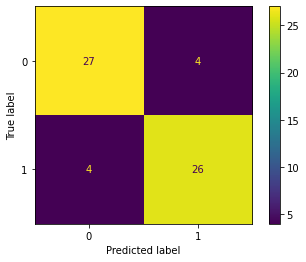

In [ ]:
# the confusion matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(svm_model, X_test, Y_test)

### Plot a Receiver Operating Characteristic curve, or ROC curve, and describe what it is and what the results indicate

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


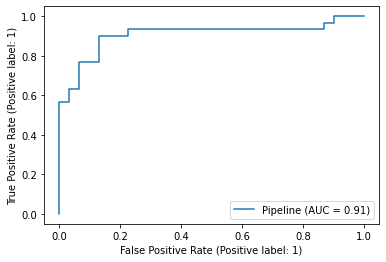

In [ ]:
metrics.plot_roc_curve(svm_model, X_test, Y_test)

[The Receiver Operating Characteristic curve provides a graphical representation of the performance of a binary classifier system. The pros of an ROC curve is that it provides a concise visual representation of the performance of a classifier and allows us to compare the various classifiers.] The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The area under an ROC curve is a measure of the usefulness of a test in general, where a greater area means a more useful test, so the areas under ROC curves are used to compare the usefulness of tests. Here we see a relatively low area under the curve indicating a poorly performing model.

### Rerun your SVM, but now modify your model parameter kernel to equal 'linear'. Again report your Accuracy, Precision, Recall, F1 scores, and Confusion matrix and plot the new ROC curve.  

In [ ]:
# SVM
clf = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel = 'linear'))
svm_model = clf.fit(X_train, Y_train)
svm_pred = svm_model.predict(X_test)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [ ]:
# the accuracy of the model
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(svm_pred, Y_test)))

# the precision of the model
print("%-12s %f" % ('Precision:', metrics.precision_score(svm_pred, Y_test)))

# the recall score of the model
print("%-12s %f" % ('Recall Score:', metrics.recall_score(svm_pred, Y_test)))

# the F1 score of the model
print("%-12s %f" % ('F1 Score:', metrics.f1_score(svm_pred, Y_test)))

Accuracy:    0.836066
Precision:   0.800000
Recall Score: 0.857143
F1 Score:    0.827586


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


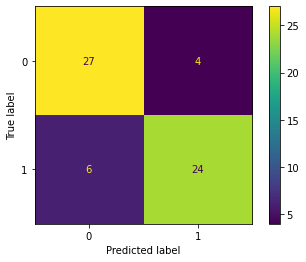

In [ ]:
# the confusion matrix
plot_confusion_matrix(svm_model, X_test, Y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


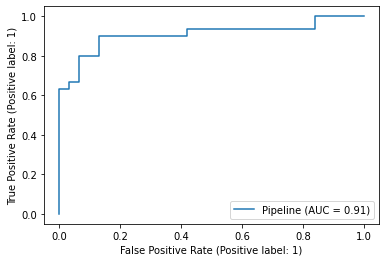

In [ ]:
# the ROC curve
metrics.plot_roc_curve(svm_model, X_test, Y_test)

### Explain the what the new results you've achieved mean. Read the documentation to understand what you've changed about your model and explain why changing that input parameter might impact the results in the manner you've observed.

[In the previous part, we have set the kernel to be linear. In lienar SVM, the given algorithm assumes to have linear seperability for each of the corresponding data point and seeks to further maximize the distance between the point and the plane. We can see that by changing the kernel to linear, I have achieved a greater accuracy as well as a greater area under the ROC curve. The usage of linear or non-linear SVMs determine on the type of data and if it is sufficient to seperate data with a straight line or a non-straight line.] 

### Both logistic regression and linear SVM are trying to classify data points using a linear decision boundary, then what’s the difference between their ways to find this boundary?

[Although both the logistic regression and linear SVM are both trying to classify data points utilizing a linear decision boundary, they use distinct optimization techniques to actually find this boundary. In other words, the two models are trying to maximize difference components. The logistic regression maximizes the posterior class probability whereas the linear SVM is trying to maximize the margin between the closest support vectors. The linear SVMs aim to place a linear boundary in a smart way. Logistic regression performs well when there is low number of dimensions and the given predictors do not suffice to provide more than a probablistic estimate to the response. On the contrary, linear SVMs perform better when there is greater dimensionality and when the predictors near-certainly determines the results. ] 